# Testing VLM Models

In [1]:
from transformers import AutoProcessor, AutoModelForImageTextToText, AutoModelForVision2Seq

from PIL import Image
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from transformers import AutoModelForCausalLM

First Tested model SMOLVLM-Instruct from: [huggingface](https://huggingface.co/HuggingFaceTB/SmolVLM-Instruct)

Didint work well

In [5]:
#processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
#model = AutoModelForImageTextToText.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")

config.json:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

In [62]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model.to(device)

Idefics3ForConditionalGeneration(
  (model): Idefics3Model(
    (vision_model): Idefics3VisionTransformer(
      (embeddings): Idefics3VisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(729, 1152)
      )
      (encoder): Idefics3Encoder(
        (layers): ModuleList(
          (0-26): 27 x Idefics3EncoderLayer(
            (self_attn): Idefics3VisionAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): Idefics3VisionMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_

In [5]:
img_url = "https://media.licdn.com/dms/image/v2/C4E03AQGqyiNuy6EMrA/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1610667497989?e=2147483647&v=beta&t=feSnK54PzETXSA4qRQhAFMys7KE-JovNFN88-a5wzyY"
image = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")

## smolVLM Test

In [65]:
prompt = """<image> Describe what the person is wearing and follow this format:

Example:
Style: Black hoodie with white text, casual streetwear vibe
Rating: 85
Comment: Clean look, but are we still doing hoodies in June?

Now describe this outfit:
Style:"""


#inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

TypeError: unsupported operand type(s) for //: 'int' and 'NoneType'

In [58]:
#model = model.to(dtype=torch.float16, device=device)

In [59]:
#outputs = model.generate(
#    **inputs,
#    max_new_tokens=128,
#    temperature=0.8,
#    top_p=0.95,
#    repetition_penalty=1.2,
#    do_sample=True,
#    eos_token_id=processor.tokenizer.eos_token_id
#)
#print("Generated!")
#description = processor.tokenizer.decode(outputs[0], skip_special_tokens=True)

Generated!


SmolVLM says: <row_1_col_1><row_1_col_2><row_1_col_3><row_1_col_4>
<row_2_col_1><row_2_col_2><row_2_col_3><row_2_col_4>
<row_3_col_1><row_3_col_2><row_3_col_3><row_3_col_4>
<row_4_col_1><row_4_col_2><row_4_col_3><row_4_col_4>

<global-img> Describe what the person is wearing and follow this format:

Example:
Style: Black hoodie with white text, casual streetwear vibe
Rating: 85
Comment: Clean look, but are we still doing hoodies in June?

Now describe this outfit:
Style: Brown shirt on a wooden deck. It has short sleeves. The fabric of it appears to be slightly thicker than paper thin, however not noticeably so. 

The man seems focused as he gazes forward at an angle showing his right shoulder from behind his elbow which looks like he's resting both hands there. His left hand rests on top of the other by leaning back against something or someone holding onto for support due to being pushed out through space. He also holds some kind of small cross necklace made of gold hanging around hi

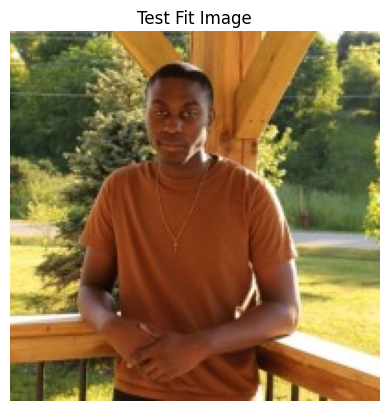

In [60]:
#print("SmolVLM says:", description)
#plt.imshow(image)
#plt.axis('off')
#plt.title("Test Fit Image")
#plt.show()

## Qwen Testing

Next tried Qwen2.5: [Link](https://huggingface.co/Qwen/Qwen2.5-VL-7B-Instruct)


This works much better

In [11]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from PIL import Image
import torch

In [12]:
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-7B-Instruct", torch_dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct")

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the cpu.


In [13]:
img_url = "https://media.licdn.com/dms/image/v2/C4E03AQGqyiNuy6EMrA/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1610667497989?e=2147483647&v=beta&t=feSnK54PzETXSA4qRQhAFMys7KE-JovNFN88-a5wzyY"
img = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")

In [18]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": img},
            {"type": "text", "text": (
                "You're a brutally honest but stylish fashion critic. "
                "Look at this outfit and describe it in detail.\n\n"
                "Then follow this format exactly:\n"
                "Style: [describe the clothing and aesthetic]\n"
                "Rating: [score out of 100]\n"
                "Comment: [funny one-line roast or boost — be witty, playful, or savage depending on the score]"
            )},
        ],
    }
]


In [19]:
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = processor(text=[text], images=[img], padding=True, return_tensors="pt").to("cuda")

In [20]:
outputs = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [out[len(inp):] for inp, out in zip(inputs.input_ids, outputs)]
result = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True)

Qwen2.5-VL says: Style: The outfit is simple yet bold, featuring a mustard-yellow t-shirt that stands out against the backdrop. The shirt's vibrant hue adds a pop of color to the ensemble, making it visually striking.
Rating: 75/100
Comment: "When you want to make a statement, but not too loud."


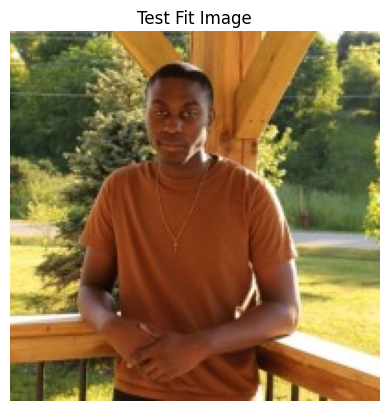

In [21]:
print("Qwen2.5-VL says:", result[0])

plt.imshow(img)
plt.axis('off')
plt.title("Test Fit Image")
plt.show()

Qwen2.5-VL says: Style: The outfit is a vibrant display of casual sports fandom. The FC Barcelona jersey, paired with a pair of jeans, exudes a relaxed yet passionate vibe. The addition of the Spotify logo adds a modern twist to the classic football fan attire.
Rating: 75/100
Comment: "When you're not just a fan, you're a Spotify-supported fan."


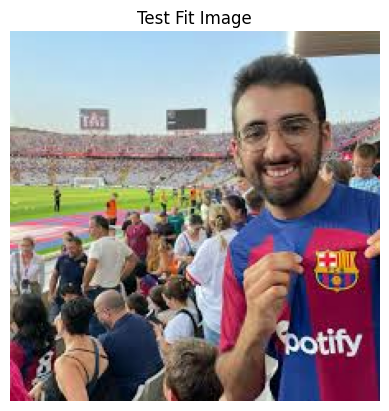

In [22]:
img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSi-jbSiRRRs1lzO-11L8xqapl_35-pKatzBQ&s"
img = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")
text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = processor(text=[text], images=[img], padding=True, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [out[len(inp):] for inp, out in zip(inputs.input_ids, outputs)]
result = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True)
print("Qwen2.5-VL says:", result[0])

plt.imshow(img)
plt.axis('off')
plt.title("Test Fit Image")
plt.show()

Paste the URL of your outfit image:  https://preview.redd.it/8f1zfh09tui31.jpg?width=1080&crop=smart&auto=webp&s=c8032dc01e5e68aa737da9c2ba87ec7c2af0ff71



Qwen2.5-VL says:
 Style: This outfit is a bold blend of streetwear with a touch of surrealism, featuring graphic patches like "Wild" and lightning bolts, paired with cut-off jeans that reveal some thigh action. The addition of sneakers completes an edgy look.
Rating: 65/100
Comment: When you mix street cred with a dash of cartoonish flair—might as well call yourself the "Wildcat Lightning Bolt." 😎⚡🐱


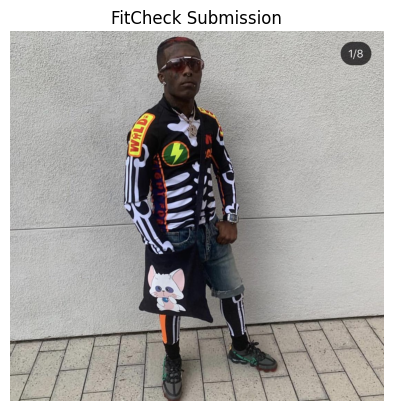

In [23]:
# Get new image
img_url = input("Paste the URL of your outfit image: ").strip()
img = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")

# Run updated image through existing prompt + model
messages[0]["content"][0]["image"] = img  # update the image in the prompt

text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = processor(text=[text], images=[img], padding=True, return_tensors="pt").to("cuda")
outputs = model.generate(
    **inputs,
    max_new_tokens=128,
    temperature=0.8,
    top_p=0.95,
    repetition_penalty=1.2,
    do_sample=True,
    eos_token_id=processor.tokenizer.eos_token_id
)
generated_ids_trimmed = [out[len(inp):] for inp, out in zip(inputs.input_ids, outputs)]
result = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True)

# Display result and image
print("\nQwen2.5-VL says:\n", result[0])
plt.imshow(img)
plt.axis('off')
plt.title("FitCheck Submission")
plt.show()
